# Kontrast i jasność obrazu

* Funkcja licząca jasność obrazka o rozmiarze MxN
    * **Jasność** $J = \frac{1}{MN} \sum_{i=1}^{M}\sum_{j=1}^{N} f(i,j)$
    dodać wszystkie wartości i podzielić przez liczbę wszystkich wartości
* Funkcja licząca kontrast obrazka o rozmiarze MxN
    * **Kontrast**  $C = \sqrt{\frac{1}{MN}\sum_{i=1}^{M}\sum_{j=1}^{N}[f(i,j)-J]^2}$
* Testujemy dla dodawania stałej - liczymy jasność i kontrast i pokazujemy wykres. Opracować wnioski czy dodawanie do obrazka stałej wartości zmienia kontrast/jasność.
* To samo dla mnożenia, potęgowania, pierwiastkowania i logarytmowania

## Treść zadania ze strony

Zadanie polega na zbadaniu wpływu operacji globalnych przeprowadzanych na macierzy obrazu w odcieniach szarości na podstawowe cechy obrazu: jasność i kontrast. W zadaniu można (lecz nie jest to konieczne) wykorzystać poniższy obraz.

Etapy:

1. wykonanie funkcji **obliczania jasności** oraz  **obliczania kontrastu** obrazu w  odcieniach szarości
2. sprawdzenie wpływu następujących operacji na jasność i kontrast obrazu:
    * dodawanie do obrazu stałej,
    * mnożenie obrazu przez stałą,
    * potęgowanie obrazu,
    * pierwiastkowanie obrazu,
    * logarytmowanie obrazu,
**UWAGA**: Proszę uwzględnić fakt, iż wybrane operacje mogą powodować szybki wzrost wartości wynikowych poza dopuszczalny zakres (0-255), proszę podjąć próbę rozwiązania tego problemu.


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

obr = img.imread('kierowca.png')
obr *= 255

## Funkcja jasności

In [21]:
def brightness(obr):
    suma = 0
    w = obr.shape[0]
    k = obr.shape[1]
    for x in range(0, w):
        for y in range(0, k):
            suma += obr[x, y, 0]

    return (suma/(w * k))

In [22]:
%%timeit -r 3

obr = img.imread('kierowca.png')
obr *= 255
brightness(obr)

42.7 ms ± 1.24 ms per loop (mean ± std. dev. of 3 runs, 10 loops each)


#### Optymalizacja funkcji jasnosci

Wyżej używałem nieoptymalnego podejścia. Numpy daje możliwość współbieżnego działania na macierzach, dlatego wykorzystam funkcję ```np.sum()```

In [23]:
def brightness(obr):
    suma = 0
    w = obr.shape[0]
    k = obr.shape[1]
    suma = np.sum(obr[:,:,0])
    return (suma/(w * k))

In [24]:
%%timeit -r 3
obr = img.imread('kierowca.png')
obr *= 255
brightness(obr)

3.98 ms ± 293 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)


Jak widać różnica jest diametralna. W podejściu klasycznym **25 ms**, przy użyciu funkcji sumy **3 ms**.

Mogę też wykorzystać funkcję `mean()`, która liczy średnią z `array`.

In [25]:
%%timeit -r 3
obr = img.imread('kierowca.png')
obr *= 255
obr.mean()

3.08 ms ± 49.7 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)


In [26]:
brightness(obr)

106.12269287109375

## Funkcja kontrastu

In [27]:
def contrast(obr):
    suma = 0
    w = obr.shape[0]
    k = obr.shape[1]
    brigh = brightness(obr)
    for x in range(0, w):
        for y in range(0, k):
            suma += (obr[x, y, 0] - brigh)**2

    kontrast = np.sqrt(suma/(w * k))
    return(kontrast)

In [28]:
%%timeit -r 3
obr = img.imread('kierowca.png')
obr *= 255
contrast(obr)

343 ms ± 19.8 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


In [29]:
contrast(obr)

22.997366796325007

### Optymalizacja funkcji kontrastu

In [30]:
def contrast(obr):
    suma = 0
    w = obr.shape[0]
    k = obr.shape[1]
    bright = brightness(obr)
    # tworze kopie bo samo obr2 = obr to tylko referencja na ta sama tablice
    obr_kontrastu = obr.copy()
    obr_kontrastu = (obr_kontrastu-bright)**2
    return(np.sqrt(obr_kontrastu.mean()))

In [31]:
%%timeit for _ in range(3): True
    
obr = img.imread('kierowca.png')
obr *= 255
contrast(obr)

4.01 ms ± 430 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [32]:
contrast(obr)

22.997368

# Przekształcenia

In [33]:
obr = img.imread('kierowca.png')
obr = obr*255
print("Jasnosc " + str(brightness(obr)))
print("Contrast " + str(contrast(obr)))

Jasnosc 106.12269287109375
Contrast 22.997368


## Dodawanie

Text(0.5,1,'Dodawanie')

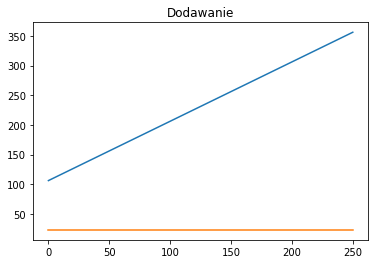

In [34]:
def dodawanie(obr, x):
    contr = np.zeros(x.shape[0])
    brig = np.zeros(x.shape[0])

    l = 0
    for i in x:
        obr2 = obr.copy() + i
        #obr2[obr2 > 255] = 255
        j = brightness(obr2)
        k = contrast(obr2)
        brig[l] = j
        contr[l] = round(k, 4);
        l += 1

    return(brig,contr)

x = np.linspace(0, 250, 10)
dod = dodawanie(obr, x)

# dodawanie
plt.plot(x, dod[0])
plt.plot(x, dod[1])
plt.title('Dodawanie')

## Mnożenie

In [35]:
def mnozenie(obr, x):
    contr = np.zeros(x.shape[0])
    brig = np.zeros(x.shape[0])

    l = 0
    for i in x:
        obr2 = obr.copy() * i
        #obr2[obr2 > 255] = 255
        j = brightness(obr2)
        k = contrast(obr2)
        brig[l] = j
        contr[l] = round(k, 4);
        l += 1

    return(brig,contr)

mnozenie
x = np.linspace(1, 5, 20)
mno = mnozenie(obr, x)

plt.plot(x, mno[0])
plt.plot(x, mno[1])
plt.title('Mnozenie')

Text(0.5,1,'Mnozenie')

## Potęgowanie

Text(0.5,1,'Potegowanie')

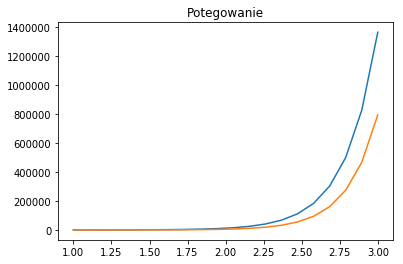

In [36]:
def potegowanie(obr, x):
    contr = np.zeros(x.shape[0])
    brig = np.zeros(x.shape[0])

    l = 0
    for i in x:
        obr2 = np.power(obr, i)
        #obr2[obr2 > 255] = 255
        j = brightness(obr2)
        k = contrast(obr2)
        brig[l] = j
        contr[l] = round(k, 4);
        l += 1

    return(brig,contr)

x = np.linspace(1, 3, 20)
pot = potegowanie(obr, x)

plt.plot(x, pot[0])
plt.plot(x, pot[1])
plt.title('Potegowanie')

## Pierwiastkowanie

In [37]:
def pierwiastkowanie(obr, x):
    contr = np.zeros(x.shape[0])
    brig = np.zeros(x.shape[0])

    l = 0
    for i in x:
        obr2 = np.power(obr, 1.0/i)
        #obr2[obr2 > 255] = 255
        j = brightness(obr2)
        k = contrast(obr2)
        brig[l] = j
        contr[l] = round(k, 4);
        l += 1

    return(brig,contr)

x = np.linspace(1, 3, 20)
pier = pierwiastkowanie(obr, x)
plt.plot(x, pier[0])
plt.plot(x, pier[1])
plt.title('Pierwiastkowanie')

Text(0.5,1,'Pierwiastkowanie')

Text(0.5,1,'Logarytmowanie')

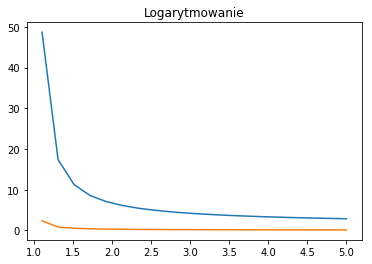

In [38]:
def logarytmowanie(obr, x):
    contr = np.zeros(x.shape[0])
    brig = np.zeros(x.shape[0])

    l = 0
    for i in x:
        obr2 = np.divide(np.log(obr),np.log(i))
        #obr2[obr2 > 255] = 255
        j = brightness(obr2)
        k = contrast(obr2)
        brig[l] = j
        contr[l] = round(k, 4);
        l += 1

    return(brig,contr)

x = np.linspace(1.1, 5, 20)
loga = logarytmowanie(obr, x)
plt.plot(x, loga[0])
plt.plot(x, loga[1])
plt.title('Logarytmowanie')